In [1]:
#2. Google News Sentiment Analysis

In [2]:
#--Importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'whitegrid', context = 'paper', palette = 'Set3', font = 'Georgia')

In [3]:
#--Loading the dataset
df = pd.read_csv('E:/Downloads/DataSets/global news.csv', encoding = 'latin_1')
df.head()

,Unnamed: 0,text,name,Date,sentiment
0,1,Theresa May has struck a deal with Brussels th...,UK,2018-11-01,0
1,2,The agreement may give UK firms continued acce...,UK,2018-11-01,1
2,3,"Nobody knows when, but the Brexit secretary, D...",UK,2018-11-01,0
3,4,There's no shame in asking voters to express t...,UK,2018-11-01,0
4,5,"Dominic Raab warns that ""obstacles remain"" but...",UK,2018-11-01,0


In [4]:
#--Dropping redundant column
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [5]:
#--Checking for null values
df.isnull().sum()

text         0
name         0
Date         0
sentiment    0
dtype: int64

In [6]:
#--Dtypes
df.dtypes

text         object
name         object
Date         object
sentiment     int64
dtype: object

In [7]:
#--Changing data types where required
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['sentiment'] = df['sentiment'].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


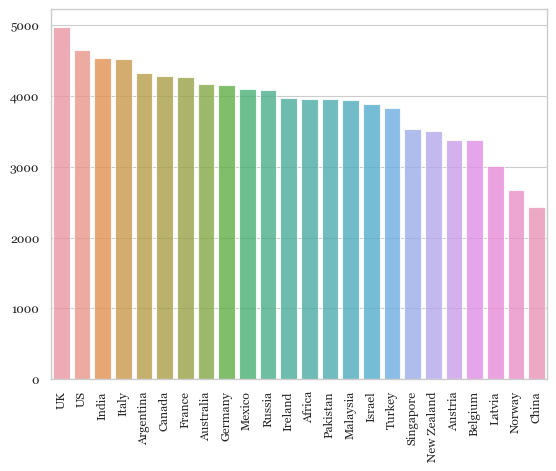

In [8]:
#--Countplot for Country
sns.barplot(df['name'].value_counts().index, df['name'].value_counts().values, alpha = .8)
plt.xticks(rotation = '90')
plt.show()

In [37]:
df['name'].value_counts().index

Index(['UK', 'US', 'India', 'Italy', 'Argentina', 'Canada', 'France',
       'Australia', 'Germany', 'Mexico', 'Russia', 'Ireland', 'Africa',
       'Pakistan', 'Malaysia', 'Israel', 'Turkey', 'Singapore', 'New Zealand',
       'Austria', 'Belgium', 'Latvia', 'Norway', 'China'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


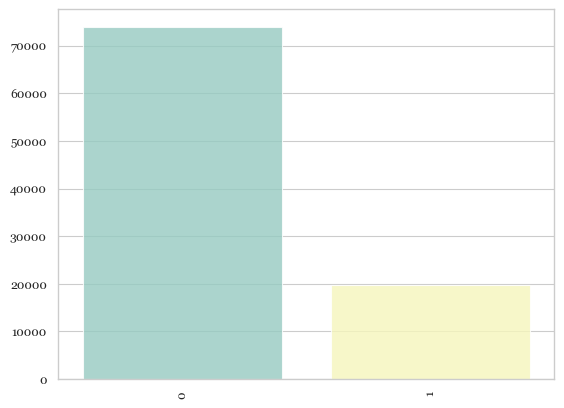

In [9]:
#--Count plot for sentiment
sns.barplot(df['sentiment'].value_counts().index, df['sentiment'].value_counts().values, alpha = .8)
plt.xticks(rotation = '90')
plt.show()

In [10]:
df['text'][0]

'Theresa May has struck a deal with Brussels that would give UK financial services companies continued access to European markets after Brexit. British and ...'

In [11]:
#--Polarity score using Text Blob
from textblob import TextBlob
text = df['text'][0]
print(f"Polarity score for first text in the data : {TextBlob(text).sentiment.polarity}")

Polarity score for first text in the data : 0.0


In [12]:
#--Polarity score using Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
#pip install vaderSentiment

In [14]:
vader = SentimentIntensityAnalyzer()
score = vader.polarity_scores(text)
polarity = score['compound']
print(f"The polarity score based on VADER is : {polarity}")

The polarity score based on VADER is : -0.25


In [15]:
#--Polarity score using NLTK ---> it is same as VADER class
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as sia
nltk.download('vader_lexicon')
analyzer = sia()
score_ = analyzer.polarity_scores(text)
polarity_ = score['compound']
print(f"The polarity score based on NLTK is : {polarity_}")

The polarity score based on NLTK is : -0.25


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [16]:
"""
def polarity(column):
    polarity_scores = []  # Create a list to store polarity scores
    for text in column:
        score = vader.polarity_scores(text)
        polarity = score['compound']
        polarity_scores.append(polarity)  # Append the polarity score to the list
    return polarity_scores  # Return the list of polarity scores
    """

"\ndef polarity(column):\n    polarity_scores = []  # Create a list to store polarity scores\n    for text in column:\n        score = vader.polarity_scores(text)\n        polarity = score['compound']\n        polarity_scores.append(polarity)  # Append the polarity score to the list\n    return polarity_scores  # Return the list of polarity scores\n    "

In [18]:
#--A function to apply for polarity scores
polarity = lambda text : vader.polarity_scores(text)['compound']
df['vader score'] = df['text'].apply(polarity)

In [19]:
df['vader score'].head()

0   -0.2500
1    0.4939
2    0.7615
3    0.7048
4   -0.2500
Name: vader score, dtype: float64

In [41]:
#--Dividing countries based on the the number of news from the country
top = ['UK', 'US', 'India', 'Italy', 'Argentina', 'Canada', 'France',
       'Australia']
middle = ['Germany', 'Mexico', 'Russia', 'Ireland', 'Africa',
       'Pakistan', 'Malaysia', 'Israel']
bottom = ['Turkey', 'Singapore', 'New Zealand',
       'Austria', 'Belgium', 'Latvia', 'Norway', 'China']

df['category'] = [0 if i in bottom else 1 if i in middle else 2 for i in df['name']]

In [ ]:
#--New data frame for visualizing
new_df = df.groupby(['category','Date']).mean()
new_df = new_df.unstack()
new_df = new_df.xs('vader score', axis = 'columns').transpose()

<Figure size 1200x1000 with 0 Axes>

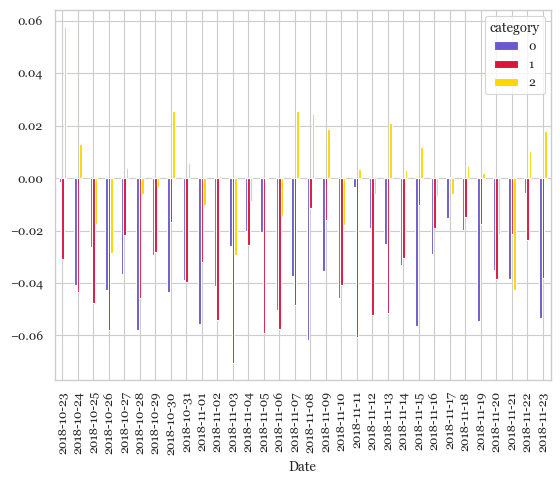

In [44]:
#--Visualizing polarity scores
plt.figure(figsize = (12,10))
new_df.plot(kind = 'bar', color = ['slateblue','crimson','gold'])
plt.show()

<span style='font-family:Lato' ><span style='font-size:135%;'>
    <center><span style='font-family:Lato' ><span style='font-size:135%;'> INSIGHTS </span></center>
    <ul><span style='font-family:Lato'><span style='font-size:125%;'>
        <li> Looking at graph above we see that there are majority of negative posts / news in the data </li>
        <li> Based on categories we find that, there seems to be only negative new/posts from the countries in middle and bottom category and the only postive posts/news are the one's from the top category.</li>
        <li> There are two ways to go about it : </li>
        <ol> <span style='font-family:Lato'><span style='font-size:125;'>
            <li> Either the posts from the middle, bottom country are generally more negative than positive. </li>
            <li> Or that we have biased in our data which only had negative posts from middle , bottom category.This biasness could be simply because of the less number of posts from those category companies.</li>
            </span>
        </ol>
        </span>
    </ul>